<a href="https://colab.research.google.com/github/Night3y3/CarPricePrediction/blob/main/CarPrice_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import tensorflow as tf # For model
import pandas as pd  #For reading and processing
import seaborn as sns #For visualisation
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np


In [68]:
data = pd.read_csv("train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [69]:
data.shape

(1000, 12)

In [70]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [71]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[3.670000e+02 5.483690e+05 7.174410e+05 ... 9.400000e+01 1.210000e+02
  3.607375e+05]
 [5.360000e+02 5.390630e+05 8.536550e+05 ... 1.010000e+02 9.600000e+01
  3.409615e+05]
 [4.830000e+02 6.684340e+05 7.988190e+05 ... 1.000000e+02 1.380000e+02
  5.080870e+05]
 ...
 [2.250000e+02 5.946960e+05 8.551050e+05 ... 5.600000e+01 1.380000e+02
  4.066575e+05]
 [3.730000e+02 5.657190e+05 7.670520e+05 ... 1.050000e+02 6.900000e+01
  4.063495e+05]
 [2.730000e+02 5.501350e+05 7.469670e+05 ... 1.080000e+02 7.500000e+01
  4.581390e+05]], shape=(1000, 12), dtype=float32)


In [72]:
X = tensor_data[:,3:-1]
print(X.shape)

(1000, 8)


In [88]:
y = tensor_data[:,-1]
y = tf.expand_dims(y, axis=-1)
print(y.shape)

(1000, 1)


In [89]:
TRAIN_RATIO = 0.8
VALIDATION_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [90]:
# Training Set
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [91]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_dataset =train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)

In [78]:
for x,y in train_dataset:
  print(x,y)
  break

tf.Tensor(
[[7.00000e+00 6.09440e+04 4.00000e+00 6.00000e+00 1.10000e+01 1.51000e+02
  1.16000e+02 1.11000e+02]
 [6.00000e+00 8.53980e+04 1.00000e+00 1.00000e+00 1.30000e+01 1.39000e+02
  1.08000e+02 7.70000e+01]
 [4.00000e+00 8.59110e+04 1.00000e+00 3.00000e+00 1.30000e+01 1.45000e+02
  7.90000e+01 7.80000e+01]
 [5.00000e+00 6.34480e+04 1.00000e+00 9.00000e+00 1.30000e+01 1.73000e+02
  1.00000e+02 1.38000e+02]
 [6.00000e+00 1.23166e+05 3.00000e+00 6.00000e+00 1.40000e+01 1.91000e+02
  1.01000e+02 1.21000e+02]
 [4.00000e+00 5.31370e+04 3.00000e+00 8.00000e+00 8.00000e+00 1.91000e+02
  1.09000e+02 1.21000e+02]
 [5.00000e+00 9.59210e+04 2.00000e+00 9.00000e+00 1.50000e+01 1.95000e+02
  1.01000e+02 9.60000e+01]
 [5.00000e+00 1.03827e+05 5.00000e+00 6.00000e+00 1.10000e+01 1.51000e+02
  7.20000e+01 1.02000e+02]
 [6.00000e+00 1.04912e+05 2.00000e+00 1.00000e+00 1.10000e+01 1.76000e+02
  7.00000e+01 1.37000e+02]
 [4.00000e+00 9.36300e+04 4.00000e+00 8.00000e+00 1.50000e+01 1.82000e+02
  9.60

In [92]:
# Validation Set
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VALIDATION_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VALIDATION_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [93]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val,y_val))
val_dataset =train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)

In [94]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VALIDATION_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VALIDATION_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [95]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test))
test_dataset =train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration= True).batch(32).prefetch(tf.data.AUTOTUNE)

In [99]:
normalizer = tf.keras.layers.Normalization()
# X_normalized = tf.constant([[3,4,5],[4,5,6]])  use it as example understanding
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.28457686, -1.089245  ,  0.7655416 , -1.6570115 , -1.6049801 ,
         0.36549738,  0.44407907,  0.8259177 ],
       [ 0.28457686, -0.12141394, -0.6587218 ,  1.1983668 ,  1.5060934 ,
         1.4604214 ,  0.78219455, -0.35649735],
       [ 0.28457686, -1.2404588 , -1.3708534 ,  1.1983668 ,  0.6172152 ,
         0.31335813,  0.7338923 ,  1.62996   ],
       [-0.294715  , -1.595784  ,  0.05340991,  0.8414445 , -1.6049801 ,
         1.2518644 ,  1.1686122 ,  0.8259177 ],
       [ 0.8638688 , -0.48404473, -1.3708534 , -1.6570115 ,  0.6172152 ,
        -1.459376  ,  1.12031   , -1.2551328 ]], dtype=float32)>

In [100]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    # Dense(128, activation = 'relu'),
    Dense(1),
])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_19 (Dense)            (None, 128)               1152      
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34,322
Trainable params: 34,305
Non-trainable params: 17
_________________________________________________

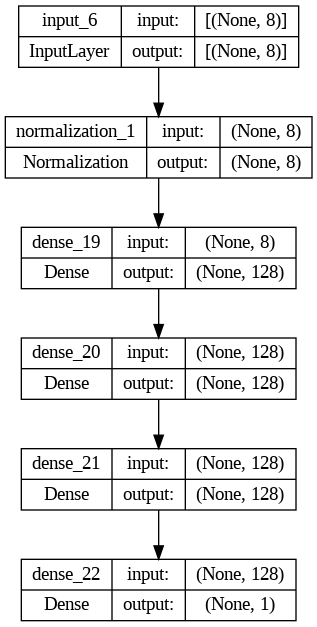

In [101]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [102]:
model.compile(optimizer= Adam(learning_rate=0.1),
              loss=MeanAbsoluteError(),
              metrics=RootMeanSquaredError()
              )

In [103]:
history = model.fit(train_dataset,validation_data=val_dataset, epochs=100, verbose=1)

Epoch 1/100
25/25 [==============================] - 2s 12ms/step - loss: 147958.3750 - root_mean_squared_error: 202420.0469 - val_loss: 59618.9688 - val_root_mean_squared_error: 72917.2891
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 48469.3281 - root_mean_squared_error: 60420.3398 - val_loss: 49877.5195 - val_root_mean_squared_error: 61680.5469
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 43111.2969 - root_mean_squared_error: 54051.5039 - val_loss: 49430.8984 - val_root_mean_squared_error: 61103.0234
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 46106.1719 - root_mean_squared_error: 57259.6289 - val_loss: 55139.7461 - val_root_mean_squared_error: 66771.5312
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 44365.7461 - root_mean_squared_error: 55725.0820 - val_loss: 40083.7734 - val_root_mean_squared_error: 49998.4805
Epoch 6/100
25/25 [==============================] - 0s 4ms/st

In [104]:
history.history

{'loss': [147958.375,
  48469.328125,
  43111.296875,
  46106.171875,
  44365.74609375,
  40779.37109375,
  45856.76171875,
  39658.1796875,
  42208.74609375,
  37324.37890625,
  39705.734375,
  40187.4765625,
  40177.55859375,
  39837.765625,
  46864.58984375,
  37251.55859375,
  42794.1015625,
  37114.546875,
  47690.37890625,
  41121.1015625,
  39546.5078125,
  38326.2109375,
  38705.078125,
  37195.09375,
  35506.94921875,
  38662.3515625,
  35903.80078125,
  38093.96484375,
  35810.1875,
  37781.37109375,
  38223.3984375,
  35784.859375,
  37774.2109375,
  36303.96875,
  38295.35546875,
  36595.35546875,
  35339.9375,
  36532.84375,
  35021.92578125,
  35864.0390625,
  39433.06640625,
  35552.859375,
  36054.2734375,
  37829.171875,
  35940.25,
  36824.26171875,
  34908.671875,
  37893.953125,
  35772.17578125,
  37971.0546875,
  35239.515625,
  34958.5234375,
  35422.8671875,
  35633.98046875,
  34327.84375,
  36402.9296875,
  35052.234375,
  36024.91796875,
  33844.56640625,
  3

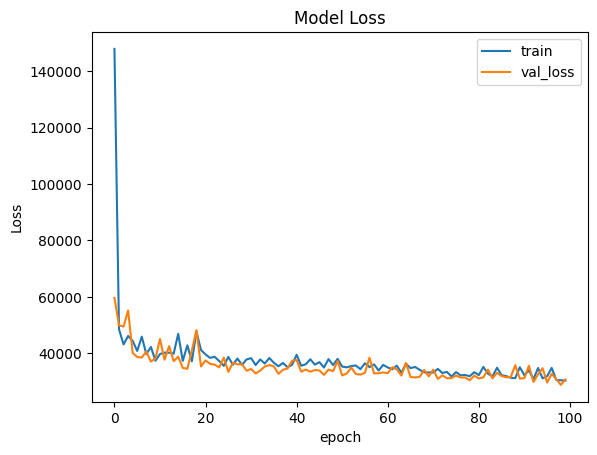

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','val_loss'])
plt.show()

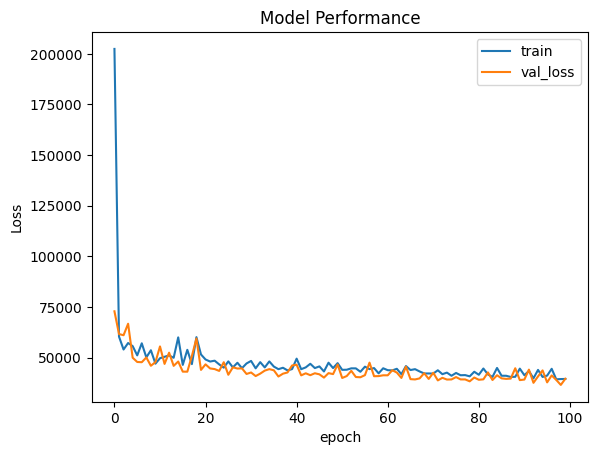

In [106]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Performance')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','val_loss'])
plt.show()

In [107]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 1s 5ms/step - loss: 43295.8594 - root_mean_squared_error: 51424.3320


[43295.859375, 51424.33203125]

In [108]:
model.predict(tf.expand_dims( X_test[0], axis = 0))

1/1 [==============================] - 0s 73ms/step


array([[142560.88]], dtype=float32)

In [27]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([379566.], dtype=float32)>

In [28]:
y_true = list(y_test[:,0].numpy())

In [65]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 3ms/step
[311910.88, 520898.66, 422139.4, 193538.72, 345786.5, 168764.64, 157578.86, 266534.62, 285585.56, 471002.47, 382867.75, 105614.7, 268595.7, 109155.44, 60846.87, 542012.0, 395641.78, 453258.3, 396672.78, 332283.06, 232761.58, 526765.06, 255037.02, 263022.9, 580208.75, 508187.34, 471486.16, 508631.66, 313119.8, 509784.56, 142721.45, 406573.75, 477516.53, 146643.19, 560178.56, 444171.8, 424739.8, 280882.75, 482931.53, 522356.38, 326122.44, 138625.08, 183758.7, 296503.44, 384188.0, 196396.84, 324070.84, 437976.03, 237493.72, 360490.0, 309350.75, 336025.38, 444389.0, 357107.06, 173302.36, 524594.25, 490451.84, 323949.44, 331688.38, 445537.88, 209711.36, 485094.94, 514533.88, 352893.8, 467027.22, 338685.88, 521628.06, 335541.38, 259492.89, 297630.12, 438755.1, 123707.17, 534266.25, 470243.47, 170264.64, 182295.61, 370503.9, 117306.71, 383593.56, 130051.16, 229642.88, 478410.8, 345623.72, 395139.56, 543031.7, 194077.45, 508029.72, 119083.664,

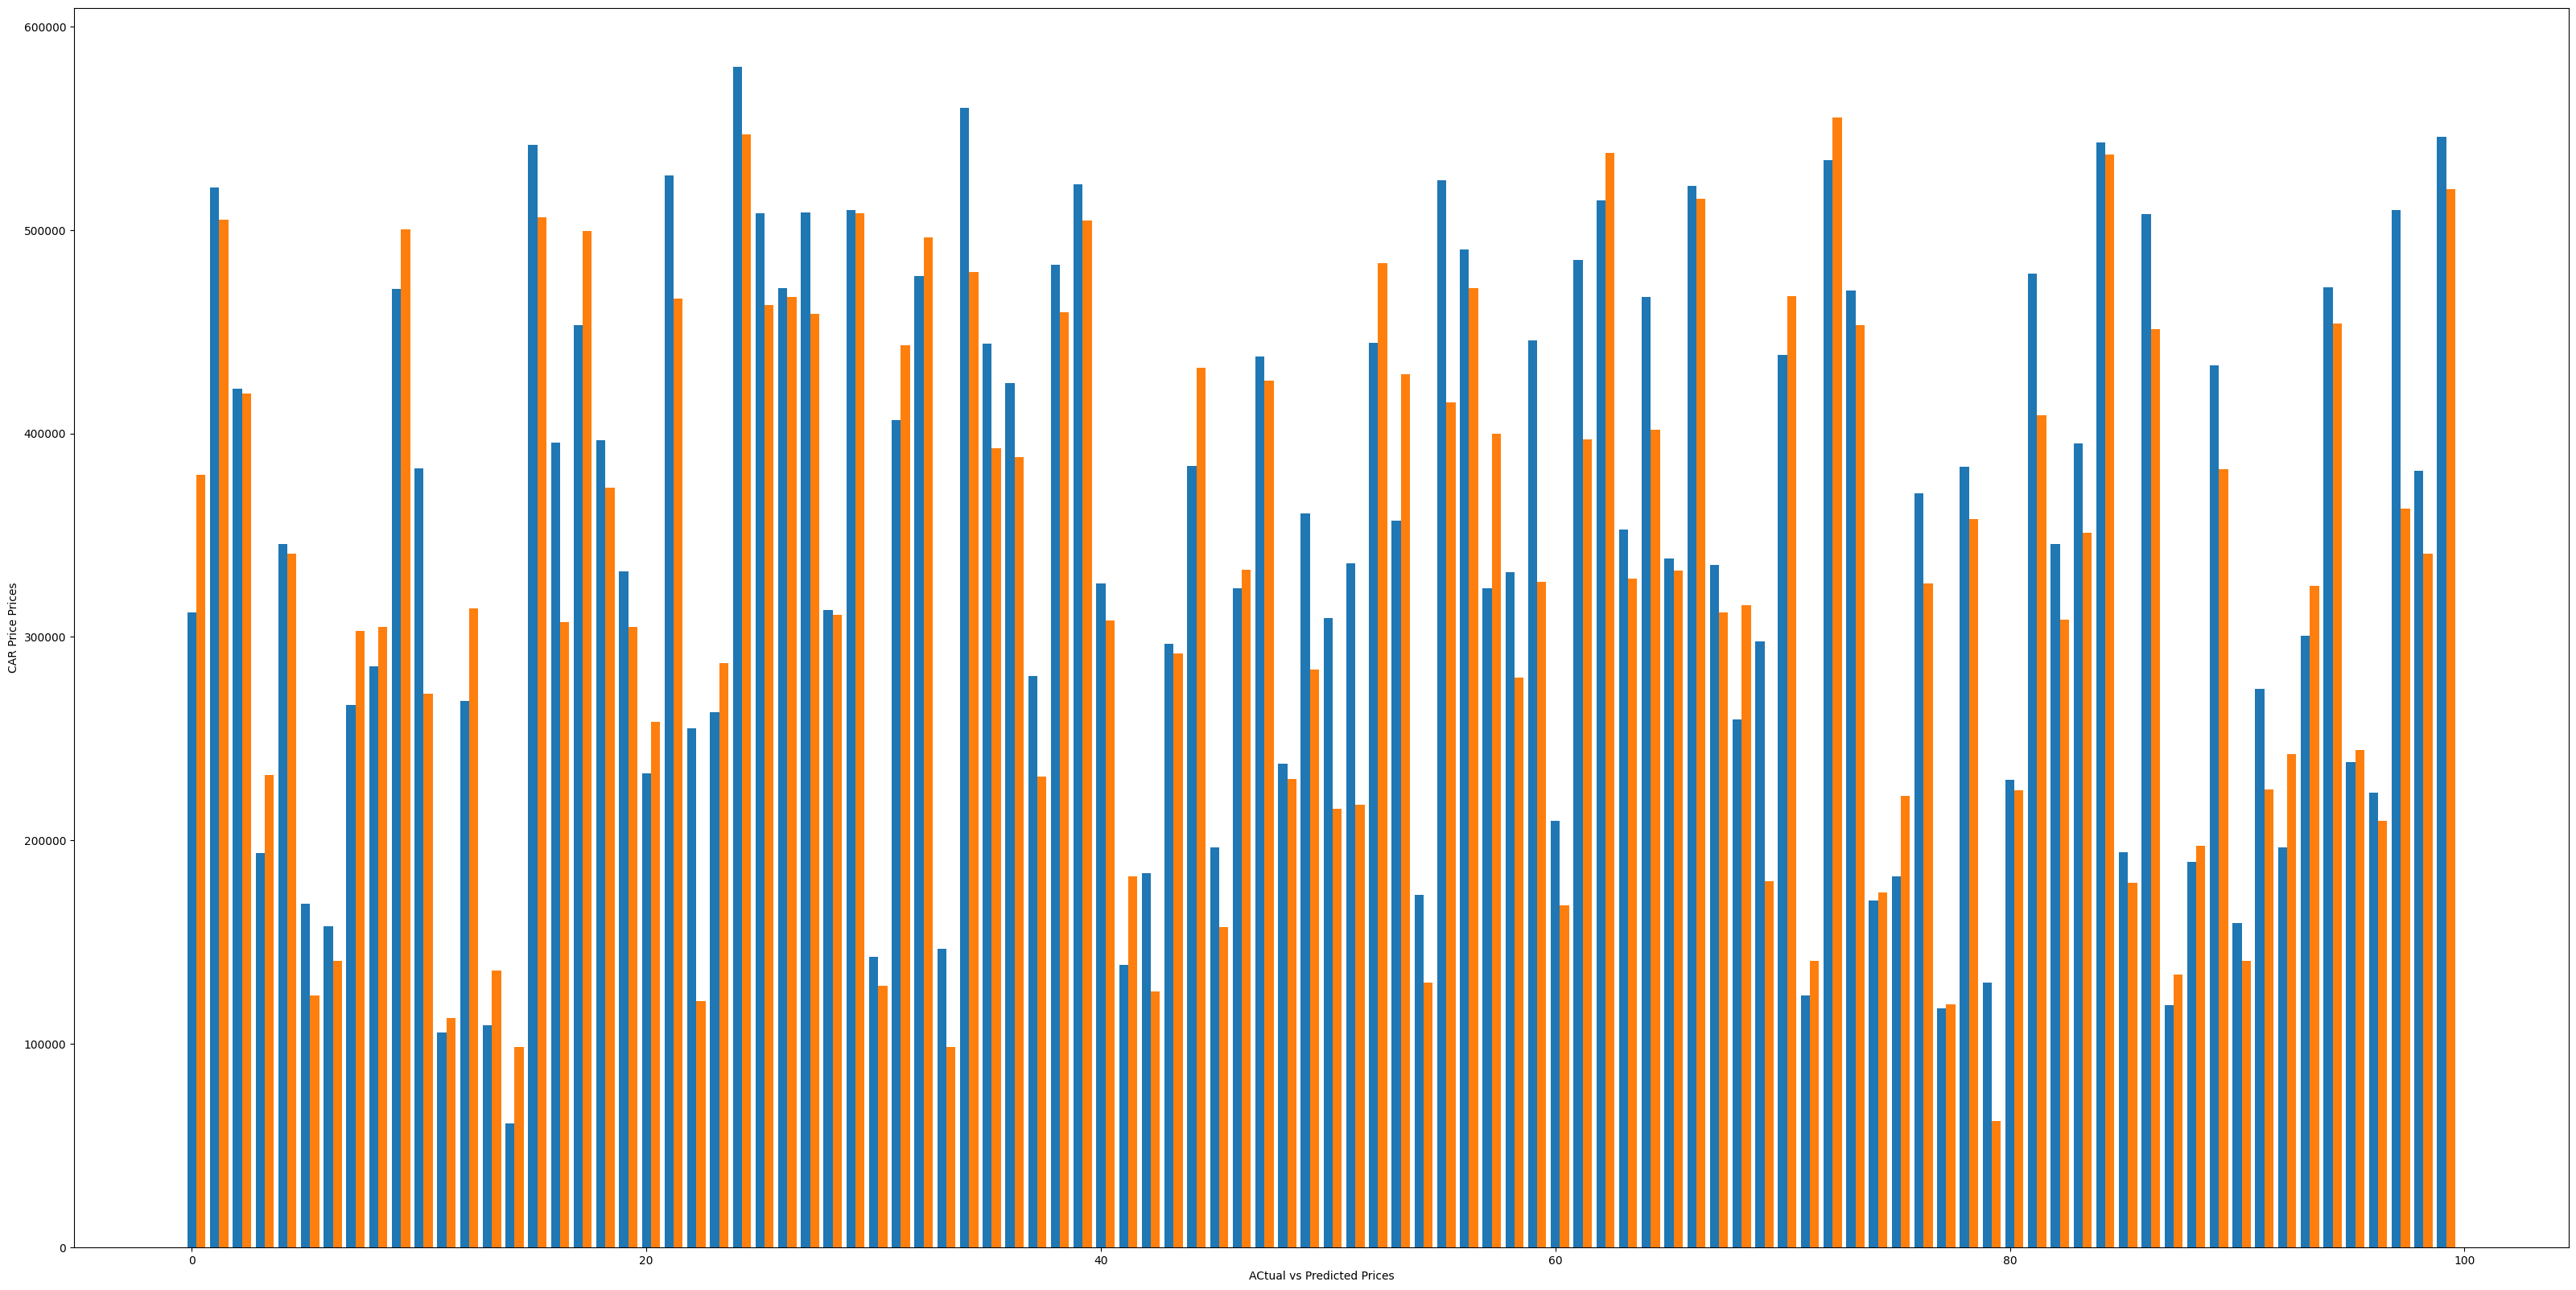

In [109]:
ind = np.arange(100)
plt.figure(figsize=(40,20))
width = 0.4
plt.bar(ind, y_pred, width, label ="Predicted Car Price")
plt.bar(ind + width, y_true,width,label="Atual Car Price")
plt.xlabel("ACtual vs Predicted Prices")
plt.ylabel("CAR Price Prices")
plt.show()